In [5]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from konlpy.tag import Okt
import pyLDAvis.gensim
import pyLDAvis
import matplotlib.pyplot as plt

In [8]:
# Okt 토크나이저를 초기화합니다.
okt = Okt()

# 간단한 한국어 불용어 리스트를 정의합니다.
korean_stopwords = ["는", "은", "이", "가", "을", "를", "에서", "의", "으로", "하고", "도", "에", "한", "으로", "고",'.']

# 예제 문장들
documents = [
    "축구 경기는 90분 동안 진행된다.",
    "야구에서는 홈런을 치면 관중들이 열광한다.",
    "테니스는 네트를 사이에 두고 상대와 경기를 한다.",
    "농구는 5명의 선수로 이루어진 팀 경기이다.",
    "마라톤은 장거리를 달리는 육상 경기이다.",
    "로맨틱 영화는 사랑 이야기를 중심으로 전개된다.",
    "액션 영화에서는 스릴 넘치는 추격 장면이 자주 등장한다.",
    "애니메이션 영화는 어린이들에게 인기가 많다.",
    "공포 영화는 긴장감을 조성하여 관객을 무섭게 한다.",
    "코미디 영화는 웃음을 주는 요소가 가득하다."
]

# 명사만 추출하여 불용어 제거
texts = [
    [word for word in okt.nouns(document) if word not in korean_stopwords]
    for document in documents
]

In [9]:
texts

[['축구', '경기', '동안', '진행'],
 ['야구', '홈런', '치면', '관중'],
 ['테니스', '네트', '사이', '상대', '경기'],
 ['농구', '명의', '선수', '팀', '경기'],
 ['마라톤', '장거리', '육상', '경기'],
 ['로맨틱', '영화', '사랑', '이야기', '중심', '전개'],
 ['액션', '영화', '스릴', '추격', '장면', '자주', '등장'],
 ['애니메이션', '영화', '어린이', '인기'],
 ['공포', '영화', '긴장감', '조성하', '관객'],
 ['코미디', '영화', '웃음', '요소']]

In [16]:
len(set([j for i in texts for j in i]))

41

In [10]:
# Gensim의 Dictionary와 Corpus를 생성합니다. =>{단어:ID,,,,}
id2word = corpora.Dictionary(texts)
# print(len(id2word))
# id2word.token2id #내용확인

In [13]:
id2word.token2id

{'경기': 0,
 '동안': 1,
 '진행': 2,
 '축구': 3,
 '관중': 4,
 '야구': 5,
 '치면': 6,
 '홈런': 7,
 '네트': 8,
 '사이': 9,
 '상대': 10,
 '테니스': 11,
 '농구': 12,
 '명의': 13,
 '선수': 14,
 '팀': 15,
 '마라톤': 16,
 '육상': 17,
 '장거리': 18,
 '로맨틱': 19,
 '사랑': 20,
 '영화': 21,
 '이야기': 22,
 '전개': 23,
 '중심': 24,
 '등장': 25,
 '스릴': 26,
 '액션': 27,
 '자주': 28,
 '장면': 29,
 '추격': 30,
 '애니메이션': 31,
 '어린이': 32,
 '인기': 33,
 '공포': 34,
 '관객': 35,
 '긴장감': 36,
 '조성하': 37,
 '요소': 38,
 '웃음': 39,
 '코미디': 40}

In [17]:
# 필터링된 단어로 Corpus를 업데이트합니다.
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1)],
 [(0, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(0, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(0, 1), (16, 1), (17, 1), (18, 1)],
 [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(21, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(21, 1), (31, 1), (32, 1), (33, 1)],
 [(21, 1), (34, 1), (35, 1), (36, 1), (37, 1)],
 [(21, 1), (38, 1), (39, 1), (40, 1)]]

In [19]:
# 최적의 토픽 수를 찾기 위한 평가
perplexity_values = []
coherence_values = []
topic_range = range(2, 7)

for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100)
    perplexity_values.append(lda_model.log_perplexity(corpus))
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model_lda.get_coherence())

In [20]:
perplexity_values

[-4.3846425240238505,
 -4.524211164563894,
 -4.7060883504649,
 -4.803613719840844,
 -4.74161118020614]

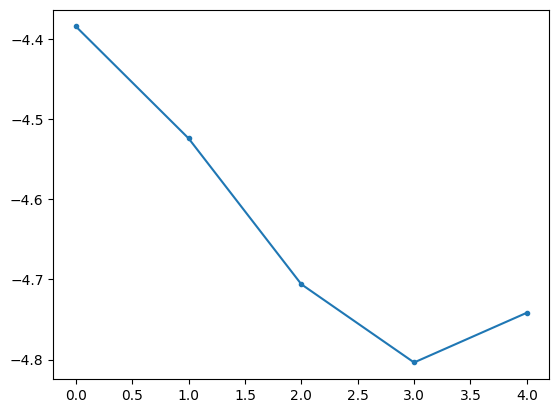

In [25]:
plt.plot(perplexity_values, marker='.')

In [21]:
coherence_values

[0.49476418565461194,
 0.5362624748744808,
 0.5918249366172885,
 0.6131007391119718,
 0.618018420890156]

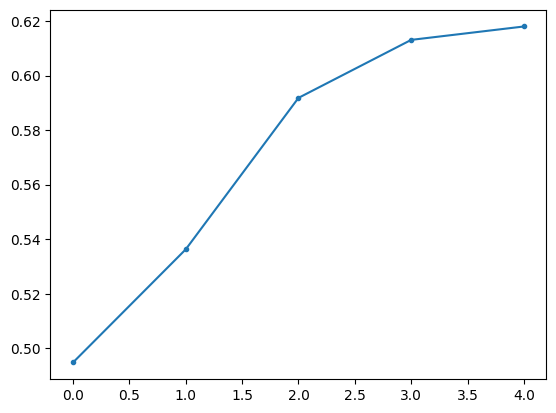

In [26]:
plt.plot(coherence_values, marker='.')

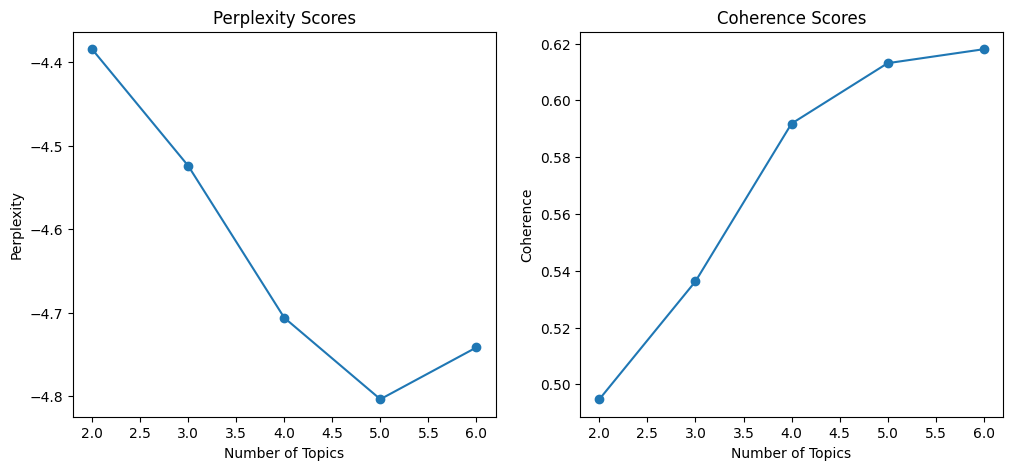

In [22]:
# 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(topic_range, perplexity_values, marker='o')
plt.title('Perplexity Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')

plt.subplot(1, 2, 2)
plt.plot(topic_range, coherence_values, marker='o')
plt.title('Coherence Scores')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')

plt.show()

In [28]:
# 최적 토픽 수로 최종 모델 학습
optimal_topics = topic_range[coherence_values.index(max(coherence_values))]
# optimal_topics=2
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=optimal_topics, random_state=100)

# pyLDAvis 시각화
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis)

In [ ]:
# # filter_extremes 메서드를 사용하여 지나치게 자주 등장하거나 거의 등장하지 않는 단어들을 제거합니다.
# # 최소 2개 이상의 문서에 등장하고, 전체 문서의 50% 이하에서 등장하는 단어만 남깁니다.
# # 분류할 단어가 많다면no_below는 값을 올리고, no_above는 값을 줄인다!
# id2word.filter_extremes(no_below=2, no_above=0.5)
# print(len(id2word))
# id2word.token2id